# 快速傅里叶变换

## DFT的矩阵表达式
设$x=[x_0,\cdots,x_{N-1}]^T$ 是一个(实值)$N$维向量，记为$\omega=e^{-j2\pi/N}$。其DFT $X(k)$的表达式为：
$$X(k)=\frac{1}{\sqrt{N}}\sum_{n=0}^{N-1}x_ne^{-j2\pi nk/N}=\frac{1}{\sqrt{N}}\sum_{n=0}^{N-1}x_n\omega^{nk}$$
使用矩阵表示形式：  
$$\left[
  \begin{matrix}X_0 \\X_1 \\X_2 \\X_3 \\\vdots \\X_{N-1}\end{matrix}
  \right]=\frac{1}{\sqrt{N}}
  \left[
  \begin{matrix}
    \omega^0 & \omega^0 & \omega^0 & \cdots & \omega^0 \\
    \omega^0 & \omega^1 & \omega^2 & \cdots & \omega^{N-1}\\
    \omega^0 & \omega^2 & \omega^4 & \cdots & \omega^{2(N-1)} \\
    \omega^0 & \omega^3 & \omega^6 & \cdots & \omega^{3(N-1)} \\
    \vdots & \vdots & \vdots & \ddots  & \vdots \\
    \omega^0 & \omega^{N-1} & \omega^{2(N-1)} & \cdots & \omega^{(N-1)^2}\end{matrix}
  \right]
  \left[
    \begin{matrix}
      x_0 \\x_1 \\x_2 \\x_3 \\\vdots \\x_{N-1}
    \end{matrix}
   \right]
    $$
这里面的$N\times N$矩阵叫做Fourier矩阵    
$$F_n=\frac{1}{\sqrt{N}}
\left[
  \begin{matrix}
    \omega^0 & \omega^0 & \omega^0 & \cdots & \omega^0 \\
    \omega^0 & \omega^1 & \omega^2 & \cdots & \omega^{N-1}\\
    \omega^0 & \omega^2 & \omega^4 & \cdots & \omega^{2(N-1)} \\
    \omega^0 & \omega^3 & \omega^6 & \cdots & \omega^{3(N-1)} \\
    \vdots & \vdots & \vdots & \ddots  & \vdots \\
    \omega^0 & \omega^{N-1} & \omega^{2(N-1)} & \cdots & \omega^{(N-1)^2}\end{matrix}
  \right]
$$

### 例1：使用Python实现DFT matrix
说明：这里产生matrix矩阵使用了$1/\sqrt{N}$因子，所以跟numpy内嵌的fft.fft计算出来有误差。去掉$1/\sqrt{N}$因子就只有精度误差了。

-4.4408920985e-16


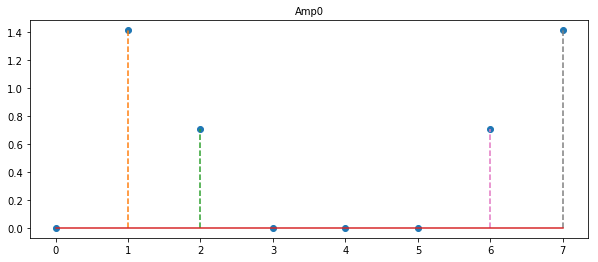

In [4]:
from numpy import *
from matplotlib import pyplot as plt

def DFT_matrix(N=8):
    i, j = meshgrid(arange(N), arange(N));
    omega = exp( - 2.0 * pi * 1j / N )
    W = power( omega, i * j ) / sqrt(N)
    return W

def funSignal(n, fs=8000.0):    
    ts = 1/fs
    a = sin(2*pi*1000*n*ts)
    b = 0.5*sin(2*pi*2000*n*ts+pi*3/4)
    return  a+b

n = array([0,1,2,3,4,5,6,7],dtype=float);newfs = 8000.0;
Xin0 = funSignal(n, newfs);
out0 = around(dot(DFT_matrix(8),Xin0.reshape(8,1)),4);
out1 = around(fft.fft(Xin0)/sqrt(8),4);
print sum(abs(out0)-abs(out1))
plt.figure(figsize=(10,4));
plt.title('Amp0',fontsize=10);plt.stem(n,abs(out0),'--');
plt.show()

## 快速傅里叶变换的矩阵推导
